In [1]:
import re
import pandas as pd

In [2]:
f = open("WhatsApp Chat with Indians in Berlin 2 🇮🇳.txt","r",encoding="utf-8")

In [3]:
data = f.read()

In [4]:
print(data)

8/5/23, 10:44 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
6/1/23, 5:15 PM - ~ Yasmin created group "Indians in Berlin 2 🇮🇳"
8/5/23, 10:42 PM - You joined using this group's invite link
8/5/23, 11:20 PM - ~ Vikas Choudhary removed +91 96331 46661
8/6/23, 12:23 AM - +49 178 7639568: Tomorrow any Lieferando wolt shift please dm
8/6/23, 12:26 AM - +49 176 27737687: Location please..?
8/6/23, 1:13 AM - +91 96545 83571: Hi

2 Room apartment available for 4-5 people.
The apartment is spacious & approx 65sqm2.
Available from now onwards, Please only ping if you are ready to move in Immediately.

Rent- 2000/ Total 

( Including everything, wifi electricity, heating)

Deposit - 4000/

Anmeldung - For all tenants

Contract - Unlimited for all tenants

Fee- Applicable.

Viewing Possible 

Location -Cautiusstraße 3B
13587 Berlin

Available from Tomorrow. ( 02-08-2023)

Thanks😊
8/6/23, 1:17 AM - +49 

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern = r'\b\d{1,2}/\d{1,2}/\d{2}, \d{1,2}:\d{2}\u202f[APMapm]{2}\b'

In [7]:
messages = re.split(pattern,data)[1:]
messages

[' - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 ' - ~\u202fYasmin created group "Indians in Berlin 2 🇮🇳"\n',
 " - You joined using this group's invite link\n",
 ' - ~\u202fVikas Choudhary removed +91 96331 46661\n',
 ' - +49 178 7639568: Tomorrow any Lieferando wolt shift please dm\n',
 ' - +49 176 27737687: Location please..?\n',
 ' - +91 96545 83571: Hi\n\n2 Room apartment available for 4-5 people.\nThe apartment is spacious & approx 65sqm2.\nAvailable from now onwards, Please only ping if you are ready to move in Immediately.\n\nRent- 2000/ Total \n\n( Including everything, wifi electricity, heating)\n\nDeposit - 4000/\n\nAnmeldung - For all tenants\n\nContract - Unlimited for all tenants\n\nFee- Applicable.\n\nViewing Possible \n\nLocation -Cautiusstraße 3B\n13587 Berlin\n\nAvailable from Tomorrow. ( 02-08-2023)\n\nThanks😊\n',
 ' - +49 178 7639568: Tomorrow any Lieferando wolt shif

In [8]:
dates = re.findall(pattern,data)

In [9]:
dates

['8/5/23, 10:44\u202fPM',
 '6/1/23, 5:15\u202fPM',
 '8/5/23, 10:42\u202fPM',
 '8/5/23, 11:20\u202fPM',
 '8/6/23, 12:23\u202fAM',
 '8/6/23, 12:26\u202fAM',
 '8/6/23, 1:13\u202fAM',
 '8/6/23, 1:17\u202fAM',
 '8/6/23, 1:18\u202fAM',
 '8/6/23, 2:35\u202fAM',
 '8/6/23, 2:42\u202fAM',
 '8/6/23, 2:42\u202fAM',
 '8/6/23, 2:45\u202fAM',
 '8/6/23, 2:49\u202fAM',
 '8/6/23, 2:50\u202fAM',
 '8/6/23, 2:50\u202fAM',
 '8/6/23, 2:50\u202fAM',
 '8/6/23, 2:51\u202fAM',
 '8/6/23, 2:52\u202fAM',
 '8/6/23, 2:52\u202fAM',
 '8/6/23, 3:08\u202fAM',
 '8/6/23, 3:10\u202fAM',
 '8/6/23, 3:10\u202fAM',
 '8/6/23, 3:11\u202fAM',
 '8/6/23, 3:11\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:12\u202fAM',
 '8/6/23, 3:16\u202fAM',
 '8/6/23, 3:19\u202fAM',
 '8/6/23, 3:19\u202fAM',
 '8/6/23, 3:19\u202fAM',
 '8/6/23, 3:19\u202fAM',
 '8/6/23, 3:20\u202fAM',
 '8/6/23, 3:20\u202fAM',
 '8/6/23, 3:20\u202fAM',
 '8/6/23, 3:20\u202f

In [10]:
df = pd.DataFrame({"user_messages":messages,"message_date":dates})
df['message_date'] = pd.to_datetime(df['message_date'], format="%m/%d/%y, %I:%M %p")
df.rename(columns={'message_date':'date'},inplace=True)

In [11]:
df.head()

,user_messages,date
0,- Messages and calls are end-to-end encrypted...,2023-08-05 22:44:00
1,"- ~ Yasmin created group ""Indians in Berlin 2...",2023-06-01 17:15:00
2,- You joined using this group's invite link\n,2023-08-05 22:42:00
3,- ~ Vikas Choudhary removed +91 96331 46661\n,2023-08-05 23:20:00
4,- +49 178 7639568: Tomorrow any Lieferando wo...,2023-08-06 00:23:00


In [12]:
df.shape

(8191, 2)

In [13]:
def split_user_message(text):
    if ': ' in text:
        return text.split(': ', 1)
    else:
        return ["group notification", text]

In [14]:
df[['user', 'message']] = df['user_messages'].apply(lambda x: pd.Series(split_user_message(x)))

In [15]:
df.drop(columns=['user_messages'], inplace=True)

In [16]:
df.head()

,date,user,message
0,2023-08-05 22:44:00,group notification,- Messages and calls are end-to-end encrypted...
1,2023-06-01 17:15:00,group notification,"- ~ Yasmin created group ""Indians in Berlin 2..."
2,2023-08-05 22:42:00,group notification,- You joined using this group's invite link\n
3,2023-08-05 23:20:00,group notification,- ~ Vikas Choudhary removed +91 96331 46661\n
4,2023-08-06 00:23:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n


In [17]:
df.shape

(8191, 3)

In [18]:
df["year"] = df['date'].dt.year

In [19]:
df["month"] = df['date'].dt.month_name()

In [20]:
df["day"] = df["date"].dt.day

In [21]:
df["hour"] = df["date"].dt.hour

In [22]:
df["minute"] = df["date"].dt.minute

In [23]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-05 22:44:00,group notification,- Messages and calls are end-to-end encrypted...,2023,August,5,22,44
1,2023-06-01 17:15:00,group notification,"- ~ Yasmin created group ""Indians in Berlin 2...",2023,June,1,17,15
2,2023-08-05 22:42:00,group notification,- You joined using this group's invite link\n,2023,August,5,22,42
3,2023-08-05 23:20:00,group notification,- ~ Vikas Choudhary removed +91 96331 46661\n,2023,August,5,23,20
4,2023-08-06 00:23:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n,2023,August,6,0,23


In [24]:
#................TO find out links in messages 

In [25]:
from urlextract import URLExtract

In [26]:
extract = URLExtract()

In [27]:
url = []
for i in df["message"]:
    url.extend(extract.find_urls(i))
    

In [28]:
len(url)

490

In [29]:
url

['https://www.usnews.com/news/world/articles/2023-08-05/missing-mexican-woman-found-dead-in-germany',
 'https://www.rundfunkbeitrag.de/',
 'https://www.wg-gesucht.de/10339658.html?ma=1',
 'https://twitter.com/bansalanie/status/1688441170706485248?s=61',
 'urbanelite.com',
 'https://www.linkedin.com/posts/fnatic-msi-kk_berlin-mexico-student-activity-7094229800025776129-UhqI?utm_source=share&utm_medium=member_android',
 'https://www.linkedin.com/jobs/view/3687736836',
 'https://www.wg-gesucht.de/9987112.html',
 'http://short.takeaway.com/de476638209',
 'https://www.wg-gesucht.de/9987112.html',
 'https://maps.app.goo.gl/Q1WQXSdWqBKNhrhW8',
 'https://www.wg-gesucht.de/9987112.html',
 'https://www.wg-gesucht.de/9987112.html',
 'https://chat.whatsapp.com/GjWZ4AeMxsp8RmXQLzr9qn',
 'https://www.wg-gesucht.de/9987112.html',
 'https://chat.whatsapp.com/E6tFeETn4dS7AZEMlyzUSc',
 'https://www.wg-gesucht.de/9987112.html',
 'station.Edeka',
 'https://www.tickettailor.com/events/desiculturehouseberli

In [30]:
df

,date,user,message,year,month,day,hour,minute
0,2023-08-05 22:44:00,group notification,- Messages and calls are end-to-end encrypted...,2023,August,5,22,44
1,2023-06-01 17:15:00,group notification,"- ~ Yasmin created group ""Indians in Berlin 2...",2023,June,1,17,15
2,2023-08-05 22:42:00,group notification,- You joined using this group's invite link\n,2023,August,5,22,42
3,2023-08-05 23:20:00,group notification,- ~ Vikas Choudhary removed +91 96331 46661\n,2023,August,5,23,20
4,2023-08-06 00:23:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n,2023,August,6,0,23
...,...,...,...,...,...,...,...,...
8186,2024-07-09 23:24:00,- +49 176 72769019,https://berlinisflat.com/for-tenants/5-roommat...,2024,July,9,23,24
8187,2024-07-09 23:27:00,- +49 176 88317530,🏡 3 room big apartment available for 7 peopl...,2024,July,9,23,27
8188,2024-07-09 23:35:00,group notification,- ~ Yasmin pinned a message\n,2024,July,9,23,35
8189,2024-07-10 03:01:00,- +49 179 3952334,Hello Everyone!\n 🏡Accommodation🏡\n\n1 space a...,2024,July,10,3,1


In [31]:
x = df['user'].value_counts().head()

In [32]:
import matplotlib.pyplot as plt

In [33]:
name = x.index
value = x.values

<BarContainer object of 5 artists>

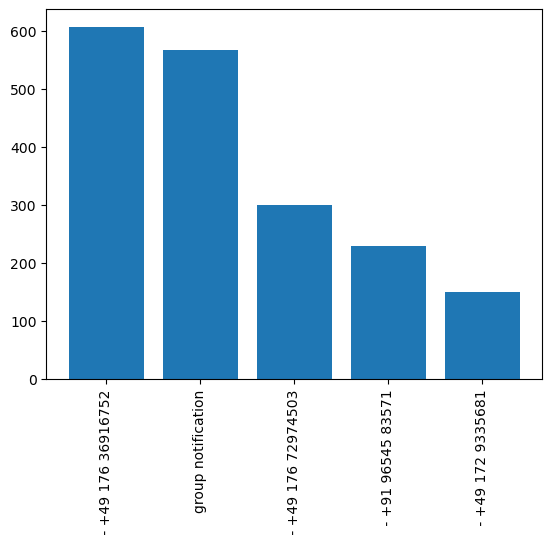

In [34]:
plt.xticks(rotation = 'vertical')
plt.bar(name,value)

In [35]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {"count":"percent"})

,user,percent
0,- +49 176 36916752,7.41
1,group notification,6.92
2,- +49 176 72974503,3.65
3,- +91 96545 83571,2.80
4,- +49 172 9335681,1.83
...,...,...
806,- +91 98111 26777,0.01
807,- +49 1520 8534463,0.01
808,- +49 176 80875183,0.01
809,- +91 70182 40765,0.01


In [36]:
#removing stop words
#removing group messsages
#removing media ommited

In [37]:
temp = df[df['user']!="group notification"]
temp = temp[temp['message']!="<Media omitted>\n"]
temp

,date,user,message,year,month,day,hour,minute
4,2023-08-06 00:23:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n,2023,August,6,0,23
5,2023-08-06 00:26:00,- +49 176 27737687,Location please..?\n,2023,August,6,0,26
6,2023-08-06 01:13:00,- +91 96545 83571,Hi\n\n2 Room apartment available for 4-5 peopl...,2023,August,6,1,13
7,2023-08-06 01:17:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n,2023,August,6,1,17
8,2023-08-06 01:18:00,- +49 176 72974503,Fees?\n,2023,August,6,1,18
...,...,...,...,...,...,...,...,...
8185,2024-07-09 23:23:00,- +91 99679 46014,‼️ Sublet Available urgently‼️\n\nA shared roo...,2024,July,9,23,23
8186,2024-07-09 23:24:00,- +49 176 72769019,https://berlinisflat.com/for-tenants/5-roommat...,2024,July,9,23,24
8187,2024-07-09 23:27:00,- +49 176 88317530,🏡 3 room big apartment available for 7 peopl...,2024,July,9,23,27
8189,2024-07-10 03:01:00,- +49 179 3952334,Hello Everyone!\n 🏡Accommodation🏡\n\n1 space a...,2024,July,10,3,1


In [38]:
f= open("stop_hinglish.txt","r")
stop_words = f.read()

In [39]:
words = []
for message in temp['message']:
    for word in message.lower().split() :
            if word not in stop_words:
                words.append(word)

In [40]:
words

['tomorrow',
 'lieferando',
 'wolt',
 'shift',
 'dm',
 'location',
 'please..?',
 '2',
 'room',
 'apartment',
 'available',
 '4-5',
 'people.',
 'apartment',
 'spacious',
 '&',
 'approx',
 '65sqm2.',
 'available',
 'onwards,',
 'ping',
 'move',
 'immediately.',
 'rent-',
 '2000/',
 'total',
 '(',
 'including',
 'everything,',
 'wifi',
 'electricity,',
 'heating)',
 'deposit',
 '-',
 '4000/',
 'anmeldung',
 '-',
 'tenants',
 'contract',
 '-',
 'unlimited',
 'tenants',
 'fee-',
 'applicable.',
 'viewing',
 'possible',
 'location',
 '-cautiusstraße',
 '3b',
 '13587',
 'berlin',
 'available',
 'tomorrow.',
 '(',
 '02-08-2023)',
 'thanks😊',
 'tomorrow',
 'lieferando',
 'wolt',
 'shift',
 'dm',
 'fees?',
 'guys,',
 'i’d',
 'suggest',
 'pay',
 'apartment.',
 'pay',
 '800',
 '2',
 'bedroom',
 'apartment',
 'schoneweide.',
 'isn’t',
 'worth',
 'it,',
 'distance',
 'center',
 '(you’re',
 'basically',
 'living',
 'border',
 'berlin)😅',
 'online',
 'find',
 'legit.',
 '2000',
 '2',
 'bedroom',
 'm

In [41]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,available,2440
1,-,2046
2,apartment,1945
3,room,1796
4,2,1222
5,berlin,1081
6,:,1021
7,anmeldung,1014
8,1,917
9,",",853


In [42]:
#emoji analysis

In [43]:
import emoji

In [44]:
pip install emoji

In [45]:
emojis = []
for i in df['message']:
    emojis.extend([c for c in i if c in emoji.EMOJI_DATA])
    

In [46]:
pd.DataFrame(Counter(emojis).most_common(20))

,0,1
0,🚨,377
1,📍,354
2,💶,264
3,‼,238
4,🔖,233
5,➡,199
6,🙏,177
7,🏠,177
8,✅,156
9,🏻,147


In [47]:
df["month_num"] = df['date'].dt.month
df

,date,user,message,year,month,day,hour,minute,month_num
0,2023-08-05 22:44:00,group notification,- Messages and calls are end-to-end encrypted...,2023,August,5,22,44,8
1,2023-06-01 17:15:00,group notification,"- ~ Yasmin created group ""Indians in Berlin 2...",2023,June,1,17,15,6
2,2023-08-05 22:42:00,group notification,- You joined using this group's invite link\n,2023,August,5,22,42,8
3,2023-08-05 23:20:00,group notification,- ~ Vikas Choudhary removed +91 96331 46661\n,2023,August,5,23,20,8
4,2023-08-06 00:23:00,- +49 178 7639568,Tomorrow any Lieferando wolt shift please dm\n,2023,August,6,0,23,8
...,...,...,...,...,...,...,...,...,...
8186,2024-07-09 23:24:00,- +49 176 72769019,https://berlinisflat.com/for-tenants/5-roommat...,2024,July,9,23,24,7
8187,2024-07-09 23:27:00,- +49 176 88317530,🏡 3 room big apartment available for 7 peopl...,2024,July,9,23,27,7
8188,2024-07-09 23:35:00,group notification,- ~ Yasmin pinned a message\n,2024,July,9,23,35,7
8189,2024-07-10 03:01:00,- +49 179 3952334,Hello Everyone!\n 🏡Accommodation🏡\n\n1 space a...,2024,July,10,3,1,7


In [48]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [49]:
timeline

,year,month_num,month,message
0,2023,6,June,1
1,2023,8,August,1672
2,2023,9,September,910
3,2023,10,October,1040
4,2023,11,November,660
5,2023,12,December,549
6,2024,1,January,666
7,2024,2,February,542
8,2024,3,March,533
9,2024,4,April,342


In [50]:
timeline.shape

(13, 4)

In [51]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [52]:
timeline['time'] = time

In [53]:
timeline

,year,month_num,month,message,time
0,2023,6,June,1,June-2023
1,2023,8,August,1672,August-2023
2,2023,9,September,910,September-2023
3,2023,10,October,1040,October-2023
4,2023,11,November,660,November-2023
5,2023,12,December,549,December-2023
6,2024,1,January,666,January-2024
7,2024,2,February,542,February-2024
8,2024,3,March,533,March-2024
9,2024,4,April,342,April-2024


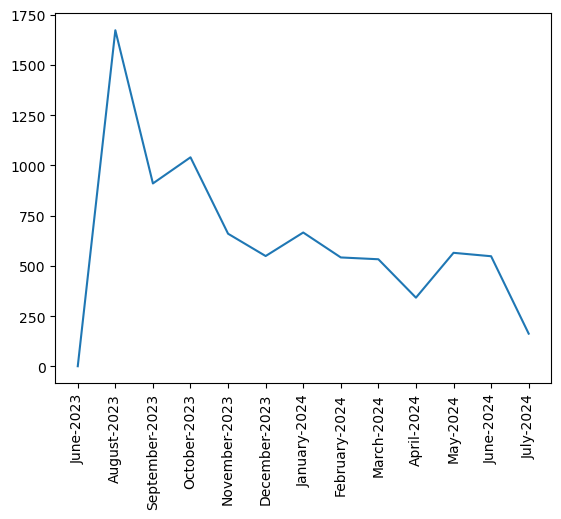

In [54]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = "vertical")
plt.show()

In [55]:
df["only_date"] = df['date'].dt.date

In [56]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [57]:
daily_timeline

,only_date,message
0,2023-06-01,1
1,2023-08-05,3
2,2023-08-06,98
3,2023-08-07,40
4,2023-08-08,120
...,...,...
336,2024-07-06,36
337,2024-07-07,15
338,2024-07-08,17
339,2024-07-09,22


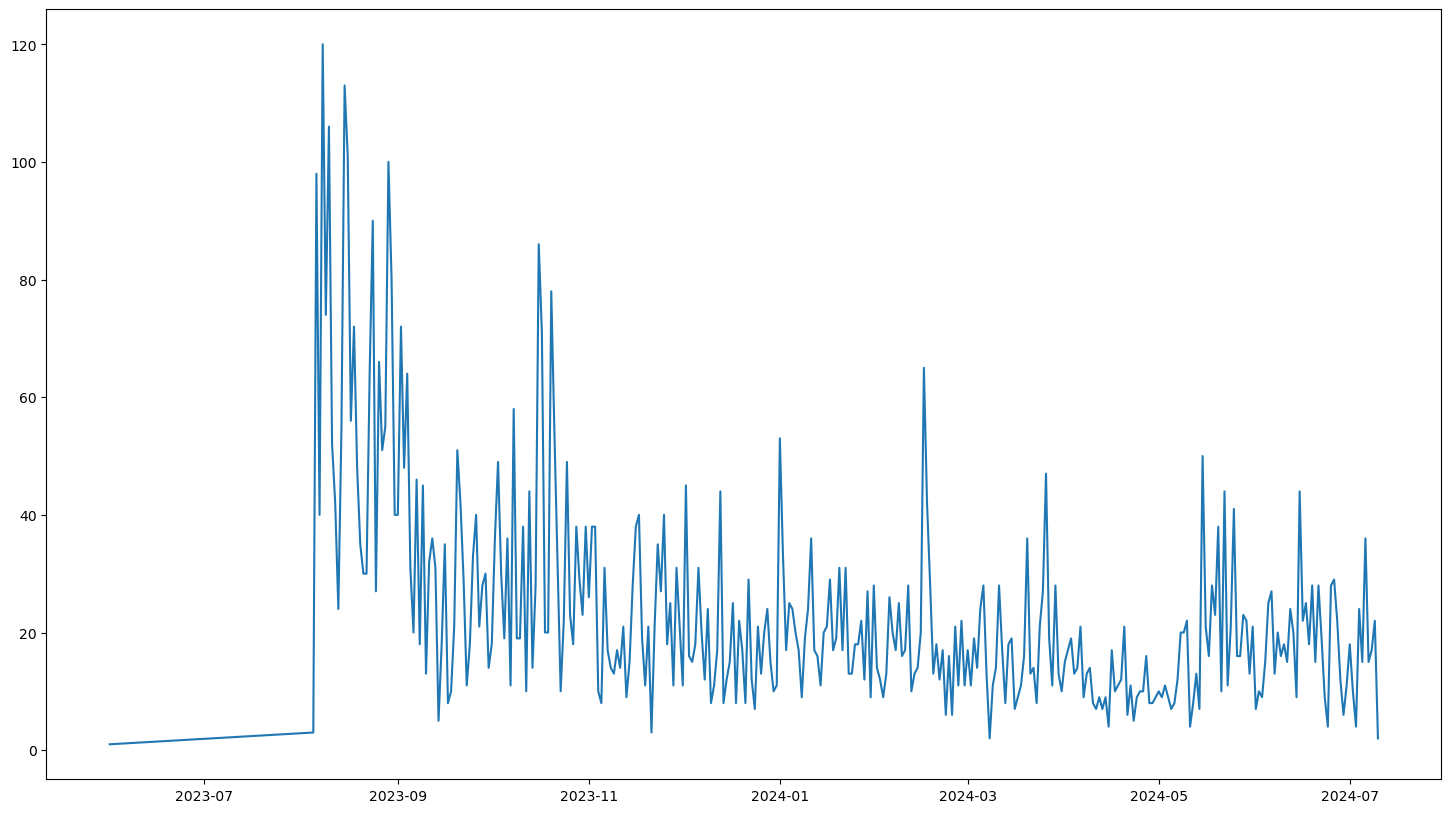

In [58]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [59]:
df["day_name"] = df['date'].dt.day_name()

In [60]:
df['day_name'].value_counts()

day_name
Wednesday    1382
Tuesday      1289
Thursday     1152
Monday       1141
Saturday     1135
Friday       1133
Sunday        959
Name: count, dtype: int64

In [61]:
df['month_name'] = df['date'].dt.month_name()

In [62]:
df['month_name'].value_counts()

month_name
August       1672
October      1040
September     910
January       666
November      660
May           565
June          549
December      549
February      542
March         533
April         342
July          163
Name: count, dtype: int64